<a href="https://www.kaggle.com/code/udariliyanawaduge/tc-predictor?scriptVersionId=293375243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/superconduct'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superconduct/superconduct_train.csv


In [2]:
## Project Title 
#Create Regression model to predict Tc
## Problem Statement 
#finding the Tc of a metal is important to find the cooling requirement of a purticular material.
## Tools Used- Python, pandas, matplotlib
## Key Features-Data cleaning, Visualization,Summary report



In [3]:
#loading data set 
import pandas as pd
df = pd.read_csv('/kaggle/input/superconduct/superconduct_train.csv')
#get the number of raws and columns 
num_raws, num_cols = df.shape 
print (f"number of raws :{num_raws}")
print (f"number of columns :{num_cols}")


number of raws :21263
number of columns :82


In [4]:
import pandas as pd
df = pd.read_csv('/kaggle/input/superconduct/superconduct_train.csv')
list(df.columns)

['number_of_elements',
 'mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'wtd_mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'wtd_entropy_fie',
 'range_fie',
 'wtd_range_fie',
 'std_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'gmean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'wtd_range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'mean_Density',
 'wtd_mean_Density',
 'gmean_Density',
 'wtd_gmean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_range_Density',
 'std_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'entropy_E

In [5]:
#load the data sheet 
import pandas as pd
file_path = "/kaggle/input/superconduct/superconduct_train.csv"
df = pd.read_csv(file_path)
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [6]:
#selecting needed columns
features = ["number_of_elements","mean_ThermalConductivity"]
target = "critical_temp"
df = df[features + [target]]
df.head()

,number_of_elements,mean_ThermalConductivity,critical_temp
0,4,107.756645,29.0
1,5,172.205316,26.0
2,4,107.756645,19.0
3,4,107.756645,22.0
4,4,107.756645,23.0


In [7]:
df.isna().sum()

number_of_elements          0
mean_ThermalConductivity    0
critical_temp               0
dtype: int64

In [8]:
#Train/Test Split of data 
from sklearn.model_selection import train_test_split 
X= df[features]
Y= df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [9]:
#Train a (mini)ML model using liner regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [10]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict (X_test)
print ("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.4175635843859149
MSE: 670.431173669732


In [11]:
# descriptive statistics of num_of_elements column
df["number_of_elements"].describe()


count    21263.000000
mean         4.115224
std          1.439295
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: number_of_elements, dtype: float64

In [12]:
#calculating coefficients
print("Coefficents:")
for feature, coef in zip(features, model.coef_):
    print(feature, ":", coef)

Coefficents:
number_of_elements : 12.921782705312781
mean_ThermalConductivity : 0.22666473881506513


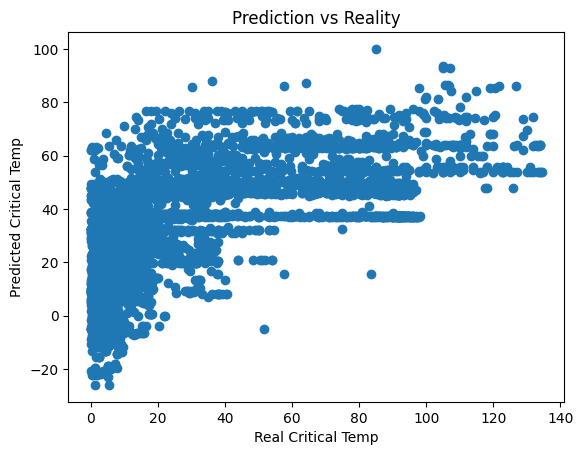

In [13]:
#Predictions vs Real values plot 
import matplotlib.pyplot as plt
plt.scatter (y_test, y_pred)
plt.xlabel("Real Critical Temp")
plt.ylabel("Predicted Critical Temp")
plt.title("Prediction vs Reality")
plt.show()

In [14]:
#In above analysis, a regresssion model has been built to predict super conducting critical tempreture using two material features : Number of elements and Thermal conductivity. 
#The data set was cleaned, missing values were handled, trained and evaluated a liner regression model using python and Scikit-learn. 

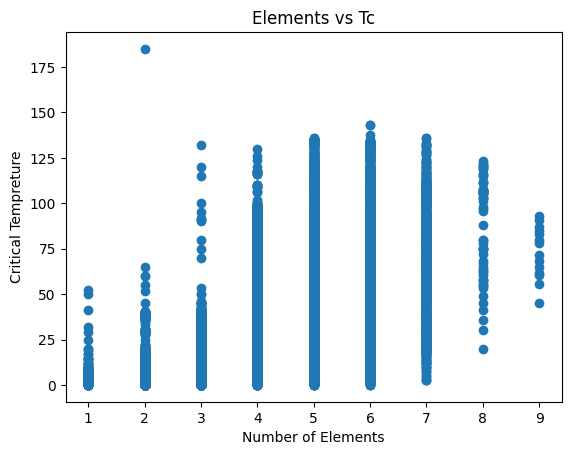

In [15]:
# plotting relationship between the parameters 
import matplotlib.pyplot as plt 
plt.scatter(df["number_of_elements"], df["critical_temp"])
plt.xlabel("Number of Elements")
plt.ylabel("Critical Tempreture")
plt.title("Elements vs Tc")
plt.show()

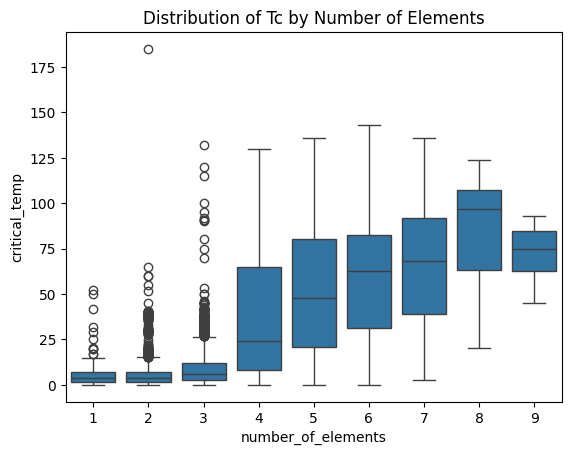

In [16]:
# regenerating the same chart using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="number_of_elements", y="critical_temp", data=df)
plt.title("Distribution of Tc by Number of Elements")
plt.show()

In [17]:
#The relationship between material compositional complexity (number of constituent elements) and superconducting critical temperature was identified. 

In [18]:
# Discussion of the results 
# critical_temp=b0+12.92K⋅(number_of_elements)+0.23K⋅(mean_ThermalConductivity)
# For every extra chemical element in the material, on average, the critical temperature increases by ~12.9 K (Thermal conductivity is kept constant)
# mean Thermal conductivity = 0.23, For every 1 unit increase in thermal conductivity, Critical Tempreture (Tc) increases by only 0.23 K
# Therefore it can concluded that the number of elements has strong effect on Tc and Mean Thermal conductivity has weaker effect on Tc. 
#Using Element vs Tc scatter plot,it can reasonably concluded that the superconducting critical temperature generally increases with the number of constituent elements up to medium compositional complexity (4–7 elements), but exhibits large variability, indicating that elemental composition alone is insufficient to fully explain Tc.